In [3]:
import sys
sys.path.append('..')

import yaml
import dlclive
from utils.utils import *
from utils.helpers import *
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

2023-10-17 10:43:15.744559: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-17 10:43:15.832875: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-17 10:43:15.835610: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-17 10:43:15.835617: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not ha

In [4]:
with open(f'../configs/latency.yaml', 'r') as file:
    config = yaml.safe_load(file)
root_dir = config['path']['root']
video_dir = f"{root_dir}/{config['path']['video']}"
model_path = f"{root_dir}/{config['path']['model']}"
output_dir = f"{root_dir}/{config['path']['output']}"
file_path = load_random_file(video_dir)

In [14]:
dlclive.benchmark_videos(model_path, [file_path], output=output_dir, resize=[0.5])



Run 1 / 1



2023-10-16 12:41:21.447923: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-16 12:41:21.448031: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sachinks/anaconda3/envs/dlc-live/lib/python3.7/site-packages/cv2/../../lib64:
2023-10-16 12:41:21.448064: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sachinks/anaconda3/envs/dlc-live/lib/python3.7/site-packages/cv2/../../lib64:
2023-10-16 12:41:21.448091: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic libra

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.



fatal: not a git repository (or any of the parent directories): .git
2023-10-16 12:41:28.777795: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-16 12:41:28.777873: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Latency
In ms: 8.46 ± 3.56 ms
In fps: 118.2 ± 280.7 fps

SYSTEM INFO
OS: Linux-6.2.0-34-generic-x86_64-with-debian-bookworm-sid
CPU: ['13th Gen Intel(R) Core(TM) i9-13900KF']

VIDEO INFO
File: /home/sachinks/Code/MyProjects/OctopusVideos/videos/right_cord_pinch_221216_124734_000-1.mp4
Video Frame Size: 320x240
FPS: 30Hz

Model: mobilenet
{'model': 'DLC_Tent6_mobilenet_v2_0.35_iteration-0_shuffle-1', 'model_type': 'mobilenet', 'TFGPUinference': True, 'im_size': array([[320, 240]]), 'stats': <zip object at 0x7efc1a527500>, 'host_name': 'ceres', 'op_sys': 'Linux-6.2.0-34-generic-x86_64-with-debian-bookworm-sid', 'python': 'dlc-live', 'device_type': 'CPU', 'device': ['13th Gen Intel(R) Core(TM) i9-13900KF'], 'freeze': ['absl-py @ file:///croot/absl-py_1666362940888/work', 'astor==0.8.1', 'astunparse==1.6.3', 'attrs==23.1.0', 'backcall @ file:///home/conda/feedstock_root/build_artifacts/backcall_1592338393461/work', 'backports.functools-lru-cache @ file:///home/conda/feedstock_root/build_ar

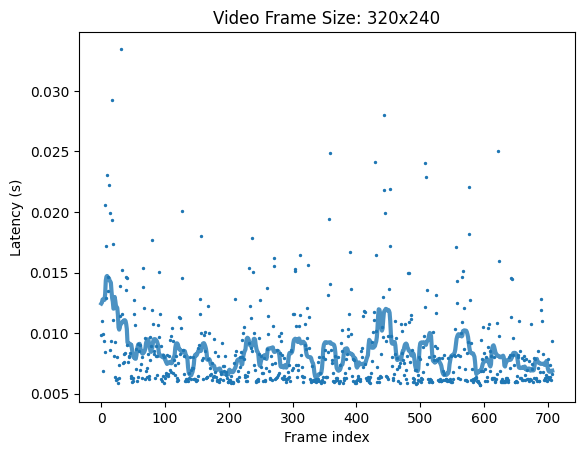

In [5]:
'''
Refer to https://deeplabcut.github.io/DLC-inferencespeed-benchmark/ for benchmark
'''

def smooth_data(data, kernel_size = 20):
    kernel = np.ones(kernel_size) / kernel_size
    # data_convolved = np.convolve(data, kernel, mode='same')
    data_convolved = ndimage.convolve(data, kernel)
    return data_convolved


file_path = f'{output_dir}/benchmark_ceres_CPU_1.pickle'

with open(file_path, 'rb') as file:
    data = pickle.load(file)

idx = 0 # only considering one video size at a time

inference_times = data['inference_times']
latency = inference_times[idx, :]
latency = latency[np.nonzero(latency)]
print("====================")
print("Latency")
print(f"In ms: {1e3*latency.mean():.2f} ± {1e3*latency.std():.2f} ms")
print(f"In fps: {1/latency.mean():.1f} ± {1/latency.std():.1f} fps")
print("====================")


print()
print("====================")
print("SYSTEM INFO")
print(f"OS: {data['op_sys']}")
print(f"{data['device_type']}: {data['device']}")
print("====================")

print()
print("====================")
print("VIDEO INFO")
filename = data['video_path'].split('\\')[-1]
print(f"File: {filename}")
video_size = data['im_size'][idx]
print(f"Video Frame Size: {video_size[0]}x{video_size[1]}")
print(f"FPS: {data['video_fps']}Hz")
print("====================")

print()
print(f"Model: {data['model_type']}")

latency_smoothed = smooth_data(latency)
X = range(len(latency))
plt.plot(latency_smoothed, linewidth=3, alpha=0.8)
plt.scatter(X, latency, s=2)
plt.plot()
plt.xlabel('Frame index')
plt.ylabel('Latency (s)')
plt.title(f"Video Frame Size: {video_size[0]}x{video_size[1]}")
# plt.show()
data.pop('inference_times')
# data['']
print(data)


# (Pdb) data.keys()
# dict_keys(['model', 'model_type', 'TFGPUinference', 'im_size', 'inference_times', 'stats', 'host_name', 'op_sys', 'python', 'device_type', 'device', 'freeze', 'python_version', 'git_hash', 'dlclive_version', 'video_path', 'video_codec', 'video_pixel_format', 'video_fps', 'video_total_frames', 'original_frame_size', 'dlclive_params'])

KeyError: 'inference_times'

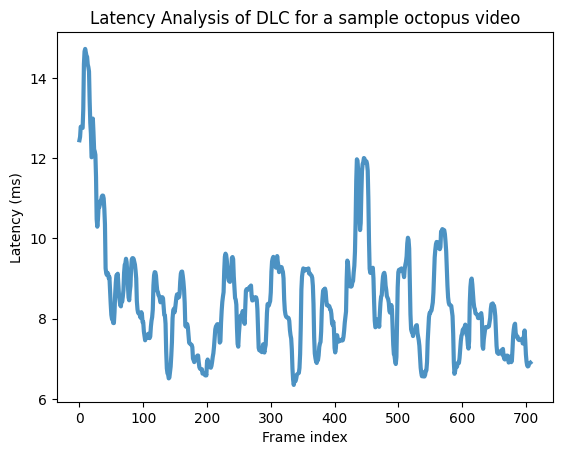

In [7]:
plt.plot(1e3*latency_smoothed, linewidth=3, alpha=0.8)
# plt.scatter(X, latency, s=2)
plt.plot()
plt.xlabel('Frame index')
plt.ylabel('Latency (ms)')
plt.title(f"Latency Analysis of DLC for a sample octopus video")
# plt.show()
data.pop('inference_times')
# data['']
print(data)